In [1]:
# be aware you need over 10GB of avaliable space to run this notebook locally
import pandas as pd
import json
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
# importing Image class from PIL package
from IPython import display

In [2]:
geo_muni=json.load(open('../../Data/geo_json_files/geo_muni.geojson','r'))

In [3]:
plotable_buildings_muni = pd.read_csv('../../Data/geo_json_files/dataframes_for_viz/muni_level_df.csv')

In [4]:
plotable_buildings_muni.drop(columns='Unnamed: 0',inplace=True)
plotable_buildings_muni.head()

building_id  district_id  vdcmun_id  ward_id  count_floors_pre_eq  \
0  120101000011           12      12007   120703                    1   
1  120101000021           12      12007   120703                    1   
2  120101000031           12      12007   120703                    1   
3  120101000041           12      12007   120703                    1   
4  120101000051           12      12007   120703                    1   

   count_floors_post_eq  age_building  plinth_area_sq_ft  height_ft_pre_eq  \
0                     1             9                288                 9   
1                     1            15                364                 9   
2                     1            20                384                 9   
3                     1            20                312                 9   
4                     1            30                308                 9   

   height_ft_post_eq  ... has_secondary_use_institution  \
0                  9  ...                             0   
1                  9  ...                             0   
2                  9  ...                             0   
3                  9  ...                             0   
4                  9  ...                             0   

  has_secondary_use_school has_secondary_use_industry  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

  has_secondary_use_health_post has_secondary_use_gov_office  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

  has_secondary_use_use_police has_secondary_use_other      dist_nm  \
0                            0                       0  OKHALDHUNGA   
1                            0                       0  OKHALDHUNGA   
2                            0                       0  OKHALDHUNGA   
3                            0                       0  OKHALDHUNGA   
4                            0                       0  OKHALDHUNGA   

                     muni_nm  muni_id  
0  SIDDHICHARAN MUNICIPALITY      118  
1  SIDDHICHARAN MUNICIPALITY      118  
2  SIDDHICHARAN MUNICIPALITY      118  
3  SIDDHICHARAN MUNICIPALITY      118  
4  SIDDHICHARAN MUNICIPALITY      118  

[5 rows x 47 columns]

In [5]:
# prepping my training and testing batches double checking class balances
X = plotable_buildings_muni.drop(columns = ['damage_grade']) 
y = plotable_buildings_muni['damage_grade']

In [6]:
# subsetting my data becuase to load with all possible data requires over 10GB of disk space
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=.40,
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state=42)


In [7]:
plotable_buildings_muni = pd.concat([X_train,y_train],axis=1)
print(plotable_buildings_muni.shape)
plotable_buildings_muni.head()

(454209, 47)


building_id  district_id  vdcmun_id  ward_id  count_floors_pre_eq  \
247669  231609000201           23      23009   231008                    3   
337623  242106000651           24      24011   241111                    2   
420398  280701010711           28      28005   280501                    2   
236669  230806000611           23      23004   230403                    2   
598049  310307000871           31      31088   311101                    2   

        count_floors_post_eq  age_building  plinth_area_sq_ft  \
247669                     0            11                288   
337623                     0            12                594   
420398                     0             4                 70   
236669                     0            35                208   
598049                     2            20                632   

        height_ft_pre_eq  height_ft_post_eq  ... has_secondary_use_school  \
247669                21                  0  ...                        0   
337623                14                  0  ...                        0   
420398                18                  0  ...                        0   
236669                12                  0  ...                        0   
598049                18                 18  ...                        0   

       has_secondary_use_industry has_secondary_use_health_post  \
247669                          0                             0   
337623                          0                             0   
420398                          0                             0   
236669                          0                             0   
598049                          0                             0   

       has_secondary_use_gov_office has_secondary_use_use_police  \
247669                            0                            0   
337623                            0                            0   
420398                            0                            0   
236669                            0                            0   
598049                            0                            0   

       has_secondary_use_other          dist_nm  \
247669                       0    SINDHUPALCHOK   
337623                       0  KABHREPALANCHOK   
420398                       0          NUWAKOT   
236669                       0    SINDHUPALCHOK   
598049                       0       MAKAWANPUR   

                                      muni_nm  muni_id  damage_grade  
247669                  MELANCHI MUNICIPALITY      262             5  
337623                 PANCHKHAL MUNICIPALITY      276             5  
420398             KISPANG RURAL MUNICIPALITY      304             5  
236669  CHOUTARA SANGACHOWKGADHI MUNICIPALITY      257             5  
598049                     THAHA MUNICIPALITY      342             3  

[5 rows x 47 columns]

The actual code blocks below is what was used to produce the visuals from my presentation with only an alteration of color parameter for each of these maps. They require about 5GB of disk space to run, and about 4GB to stroe so for the purpose of reproducibility please run the cells below in stages. I would advise to split up into different into different notebooks themselves but would rather not have the user need to click through a variety of different tabs to view all visuals and respective code. 

I also imported the static image of what each code block displays for interactivity you will need to actually run the code blocks just above the image import

In [ ]:
# looking at damage grade variation across municipalities
fig = px.choropleth_mapbox(plotable_buildings_muni, geojson=geo_muni, locations='muni_id', color='damage_grade',
                           color_continuous_scale="Viridis",
                           mapbox_style="stamen-terrain",
                           zoom=7,
                           opacity=0.5,center = {"lat": 27.711539475362535, "lon": 85.3249306241579},
                           labels={'damage_grade':'damge grade'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

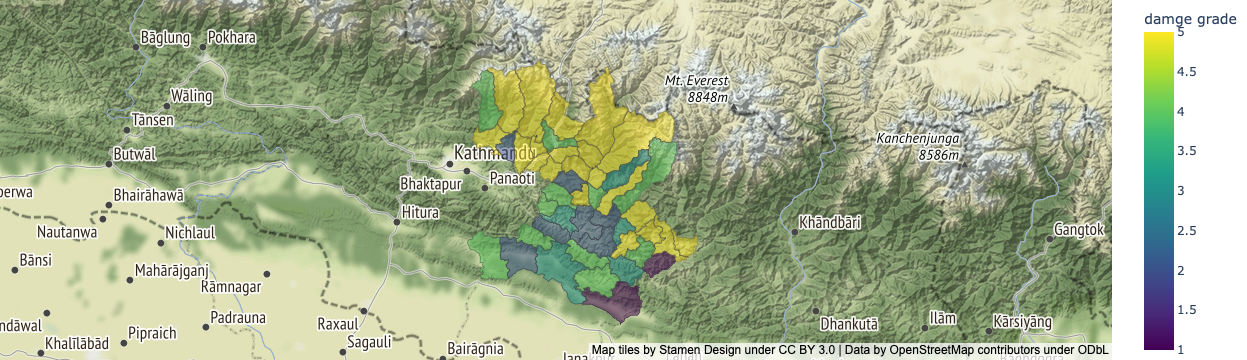

In [14]:
# creating a object
display.Image("../../Viz/damage_grade_muni.png")

In [ ]:
# looking at damage grade variation across municipalities
fig = px.choropleth_mapbox(plotable_buildings_muni, geojson=geo_muni, locations='muni_id', color='damage_grade',hover_data=['damage_grade'],
                           color_continuous_scale="Viridis",
                           range_color=(0, 4),
                           mapbox_style="stamen-terrain",
                           zoom=4,
                           opacity=0.5,center = {"lat": 27.711539475362535, "lon": 85.3249306241579},
                           labels={'damage_grade':'damge grade'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

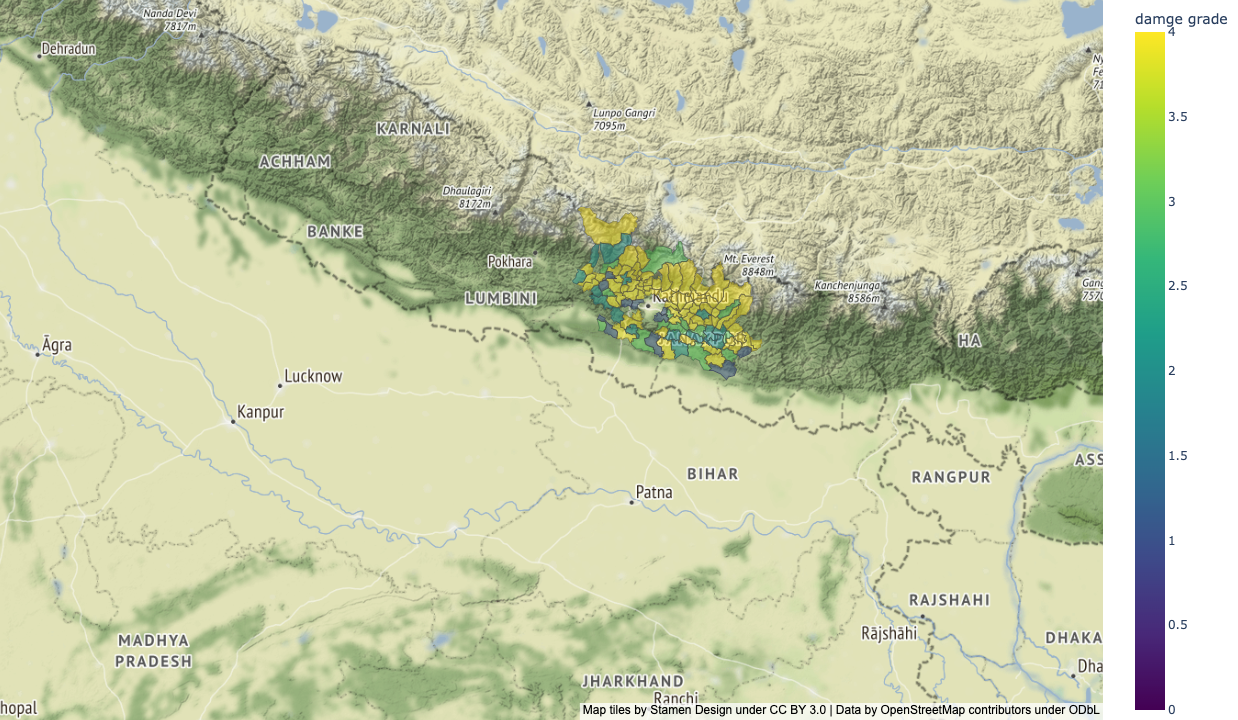

In [17]:
display.Image("../../Viz/zoomed_out_nepal.png") # THIS IS ACTUALLY THE SAME AS THE FIRST CHORO MAP JUST ZOOMED OUT

In [ ]:
# looking at dummified values (densities)
fig = px.choropleth_mapbox(plotable_buildings_muni, geojson=geo_muni, locations='muni_id', color='age_building',hover_data=['damage_grade'],
                           color_continuous_scale="Plasma",
                           #range_color=(0,,
                           mapbox_style="stamen-terrain",
                           zoom=8,
                           opacity=0.5,center = {"lat": 27.711539475362535, "lon": 85.3249306241579},
                           labels={'damage_grade':'damge grade'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

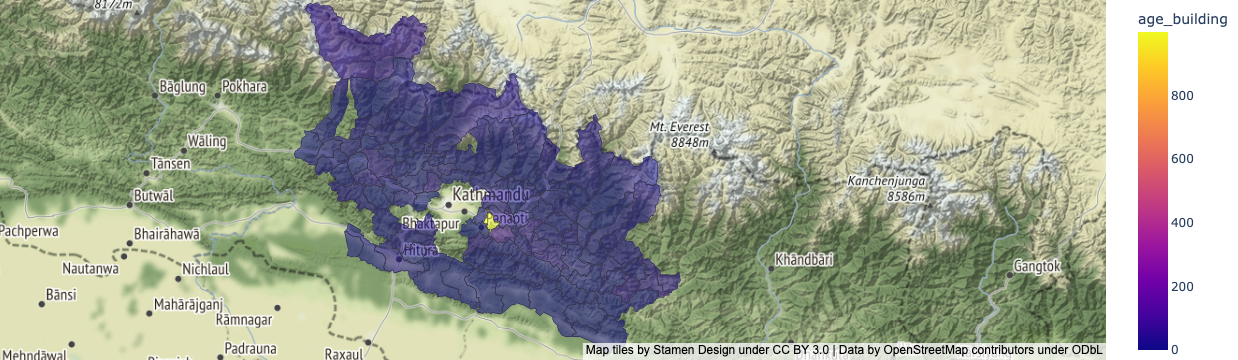

In [15]:
display.Image("../../Viz/age_building.png")

In [ ]:
fig = px.choropleth_mapbox(plotable_buildings_muni, geojson=geo_muni, locations='muni_id', color='count_floors_pre_eq',hover_data=['damage_grade'],
                           color_continuous_scale="Plasma",
                           #range_color=(0,,
                           mapbox_style="stamen-terrain",
                           zoom=8,
                           opacity=0.5,center = {"lat": 27.711539475362535, "lon": 85.3249306241579},
                           labels={'damage_grade':'damge grade'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

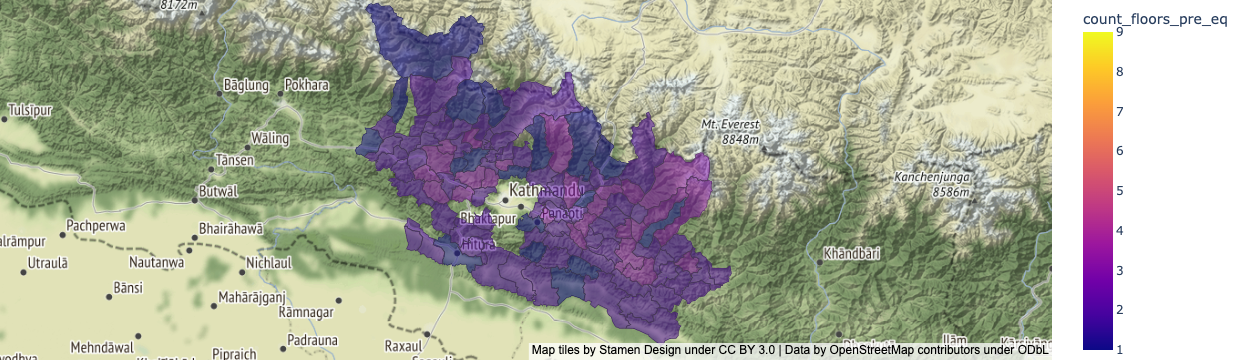

In [16]:
display.Image("../../Viz/count_floors_pre_eq.png")

In [ ]:
fig = px.choropleth_mapbox(plotable_buildings_muni, geojson=geo_muni, locations='muni_id', color='count_floors_post_eq',hover_data=['damage_grade'],
                           color_continuous_scale="Plasma",
                           #range_color=(0,,
                           mapbox_style="stamen-terrain",
                           zoom=8,
                           opacity=0.5,center = {"lat": 27.711539475362535, "lon": 85.3249306241579},
                           labels={'damage_grade':'damge grade'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [28]:
display.Image("../../Viz/count_floors_post_eq.png")

Looking at densities meaning that a groupby municipality level was needed.

In [22]:
# looking at dummified values (densities)
fig = px.choropleth_mapbox(plotable_buildings_muni.groupby('muni_nm').mean(), geojson=geo_muni, locations='muni_id', color='has_secondary_use_hotel',
                           color_continuous_scale="Viridis",
                           #range_color=(0,,
                           mapbox_style="stamen-terrain",
                           zoom=7,
                           opacity=0.5,center = {"lat": 27.711539475362535, "lon": 85.3249306241579},
                           labels={'damage_grade':'damge grade'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
has_secondary_use_hotel

In [20]:
display.Image("../../Viz/has_secondary_use_hotel.png")

In [25]:
# looking at dummified values (densities)
fig = px.choropleth_mapbox(plotable_buildings_muni.groupby('muni_nm').mean(), geojson=geo_muni, locations='muni_id', color='has_secondary_use_gov_office',
                           color_continuous_scale="Viridis",
                           #range_color=(0,,
                           mapbox_style="stamen-terrain",
                           zoom=7,
                           opacity=0.5,center = {"lat": 27.711539475362535, "lon": 85.3249306241579},
                           labels={'damage_grade':'damge grade'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [26]:
display.Image("../../Viz/has_secondary_use_gov_office.png")